# Exploratory Data Analysis 

This data was made available to Daniel Fiume from the Privacy Rights Clearinghouse Team for student analysis, visualization, and now ML. This data may not be distributed and is not included here.

The Data Breach Chronology Database is a collection of publically reported data breaches. The data was gathered through a text analysis of publically released letter/statements/news articles about data breaches. For more info, see the README in /data

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib as plt

### What's in and not in this data?

In [2]:
# Load the data
path = "/Users/djfiume/Desktop/DSI/1030/data-breach-ml"
breaches = pd.read_csv(path + "/data/PRC-DataBreachChronology-v1.5-01.31.2024-NOBREACHNOTIFICATIONLETTERS.csv")
print(breaches.columns)
print("The (rows, columns) of this dataset is: \n ", breaches.shape)
print("\nThe datatypes of our columns is as follows: \n", breaches.dtypes)
breaches.head()

Index(['Name of Entity', 'Likely Duplicate Breach', 'Source', 'Reported Date',
       'Date of Breach', 'Organization Type', 'Organization Type Explanation',
       'Breach Type', 'Breach Type Explanation', 'Max Records Impacted',
       'Max Records Impacted Explanation', 'Description', 'Information Types',
       'breach_location_street', 'breach_location_city',
       'breach_location_state', 'breach_location_ZIP',
       'breach_location_country', 'breach_location_explanation',
       'Records Impacted From Source', 'State Records Impacted from Source',
       'Notification URL', 'PDF', 'DBA-UUID', 'Date of Breach End',
       'Total Records Impacted From Letter',
       'State Records Impacted from Letter', 'Description of Breach'],
      dtype='object')
The (rows, columns) of this dataset is: 
  (35167, 28)

The datatypes of our columns is as follows: 
 Name of Entity                        object
Likely Duplicate Breach               object
Source                                

,Name of Entity,Likely Duplicate Breach,Source,Reported Date,Date of Breach,Organization Type,Organization Type Explanation,Breach Type,Breach Type Explanation,Max Records Impacted,...,breach_location_explanation,Records Impacted From Source,State Records Impacted from Source,Notification URL,PDF,DBA-UUID,Date of Breach End,Total Records Impacted From Letter,State Records Impacted from Letter,Description of Breach
0,STRATA Trust Company,NaN,CA,2020/07/17,2020/02/10,BSF,"STRATA Trust Company is a trust company, which...",HACK,The description of the breach indicates that t...,UNKN,...,The Data Breach Notification Letter provided a...,UNKN,UNKN,https://oag.ca.gov/system/files/Frontier%20Ban...,https://databreacharchives.com/api/v1/pdf/CA\s...,0004903038160326516112cf45332a8c,2020/02/11,UNKN,UNKN,STRATA Trust Company experienced unusual activ...
1,Gannett Company Inc.,Gannett_Company_Inc.-6fc8ae0a-89e2-4dbd-8f05-c...,IA,2017/04/28,2017/03/30,BSO,"Gannett Company, Inc. is primarily a media com...",HACK,The breach was a result of a phishing attack t...,18100,...,The location information is provided at the en...,UNKN,UNKN,https://www.iowaattorneygeneral.gov/media/cms/...,https://databreacharchives.com/api/v1/pdf/IA\g...,0007779852bc8744eccf01b3c3d6d67a,UNKN,18100,634,"Gannett Company, Inc. experienced a phishing a..."
2,Somerset County,NaN,IN,2022/09/28,2022/05/19,GOV,The name 'Somerset County' indicates it is a l...,UNKN,The breach type is classified as 'UNKN' due to...,14599,...,The breach notification does not include speci...,14599,7,NaN,NaN,0007f1d701325fc8f0f07ce1d5286755,UNKN,UNKN,UNKN,The breach at Somerset County occurred on May ...
3,Bed Bath & Beyond Inc.,Bed_Bath_&_Beyond_Inc.-0bf67bf4-6042-4d0c-ae4d...,ME,2018/02/13,2017/11/21,BSR,"Bed Bath & Beyond Inc. is a retail business, w...",UNKN,Insufficient details about the breach are prov...,1,...,The breach notification does not provide speci...,UNKN,1,NaN,NaN,0008303654e1c86c0a084229875c4953,2017/12/08,UNKN,UNKN,Bed Bath & Beyond Inc. experienced a data brea...
4,Angola Wire Products Inc.,Angola_Wire_Products_Inc.-99932b50-fb4a-4a1b-9...,IN,2023/06/02,2023/01/05,BSO,Angola Wire Products Inc. appears to be a manu...,UNKN,The data breach report does not provide specif...,1085,...,The breach notification source indicates that ...,1085,647,NaN,NaN,0008f6856a8bf95420aa1b595be86e15,UNKN,UNKN,UNKN,"The breach occurred on January 5, 2023, and wa..."


In [3]:
# Look for missing data

# cols with missing data: Likely Duplicate Breach, Description, Description of Breach (only 16), Notification URL, PDF 
# breaches.isna().sum()

#TODO Look into Likely Duplicate Breach Field

print(breaches.isnull().sum())

# There are fields labeled at UNKN. This is our missing data. Note there are 35167 total records
breaches[breaches == "UNKN"].count()

Name of Entity                            0
Likely Duplicate Breach               12246
Source                                    0
Reported Date                             0
Date of Breach                            0
Organization Type                         0
Organization Type Explanation             0
Breach Type                               0
Breach Type Explanation                   0
Max Records Impacted                      0
Max Records Impacted Explanation          0
Description                           30426
Information Types                         0
breach_location_street                    0
breach_location_city                      0
breach_location_state                     0
breach_location_ZIP                       0
breach_location_country                   0
breach_location_explanation               0
Records Impacted From Source              0
State Records Impacted from Source        0
Notification URL                      18310
PDF                             

Name of Entity                           10
Likely Duplicate Breach                   0
Source                                    0
Reported Date                           558
Date of Breach                         7950
Organization Type                       335
Organization Type Explanation             0
Breach Type                           15124
Breach Type Explanation                   0
Max Records Impacted                   8123
Max Records Impacted Explanation          0
Description                               0
Information Types                         0
breach_location_street                28256
breach_location_city                  19776
breach_location_state                 14618
breach_location_ZIP                   25979
breach_location_country                3129
breach_location_explanation               0
Records Impacted From Source          20770
State Records Impacted from Source    17254
Notification URL                          0
PDF                             

### Looking into fields that could potentially be labels

In [4]:
# Categorical
cats = breaches[["Breach Type", "Source", "Organization Type", "breach_location_state"]]
print(breaches["Breach Type"].value_counts())
print(breaches["Source"].value_counts())
#print(breaches["Information Types"].value_counts())
print(breaches["Organization Type"].value_counts())
print(breaches["breach_location_country"].value_counts())
print(breaches["breach_location_state"].value_counts())

Breach Type
UNKN    15124
HACK    13527
DISC     2629
PORT     1198
INSD     1125
CARD      709
PHYS      610
STAT      245
Name: count, dtype: int64
Source
IN     9623
MD     4718
HHS    4692
CA     3443
NH     3164
ME     2816
MA     1925
MT     1818
VT      838
TX      485
OR      479
IA      471
WA      359
WI      165
NJ      124
DE       47
Name: count, dtype: int64
Organization Type
BSO     11227
MED      8610
BSF      6509
BSR      4324
EDU      2092
GOV      1245
NGO       825
UNKN      335
Name: count, dtype: int64
breach_location_country
United States         31843
UNKN                   3129
Canada                   66
United Kingdom           31
USA                      14
Bahamas                   8
Netherlands               6
Germany                   6
Chile                     6
Puerto Rico               5
Australia                 5
Sweden                    4
China                     4
Norway                    4
New Zealand               4
Kazakhstan               

       Max Records Impacted  Records Impacted From Source  \
count                9595.0                        9595.0   
mean                74480.7                       74083.4   
std               1634607.8                     1634363.8   
min                     1.0                           0.0   
25%                   180.5                         179.0   
50%                  1193.0                        1192.0   
75%                  6491.0                        6483.0   
max             143000000.0                   143000000.0   

       State Records Impacted from Source  
count                              9595.0  
mean                               2626.8  
std                               59359.3  
min                                   0.0  
25%                                   1.0  
50%                                   5.0  
75%                                  42.5  
max                             3800000.0  


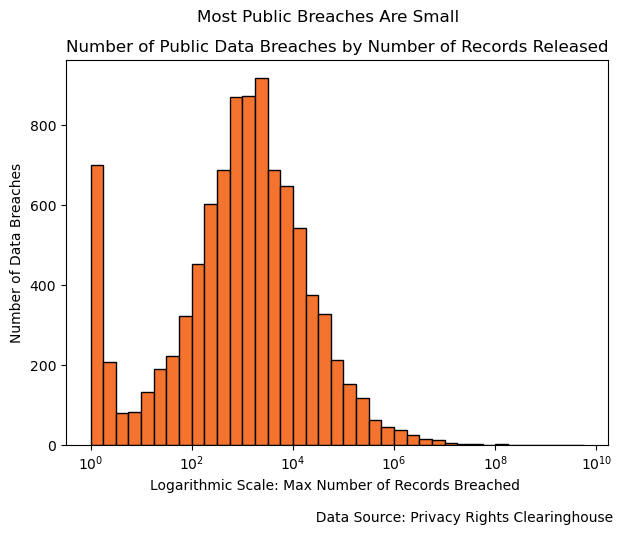

In [138]:
from matplotlib import pylab as plt

# Quantitative / Num Records Data
pd.options.display.float_format = '{:.1f}'.format

quant = breaches[["Max Records Impacted", "Records Impacted From Source", "State Records Impacted from Source"]]
no_unkn = quant.replace("UNKN", None)
no_unkn = no_unkn.dropna(axis="index")
no_unkn = no_unkn.apply(pd.to_numeric)

print(no_unkn.describe())

target = no_unkn["Max Records Impacted"]
#target = np.log(target + 1)
#print(np.sort(target))
bins = 10**np.arange(0,10, 0.25)

plt.figure(figsize=(7,5))
plt.hist(target, bins = bins, color ="#F4742F", edgecolor = "black")
plt.xscale('log')
plt.xticks(10**np.arange(0,11,2))
#plt.gca().set_xscale("log")
#target.plot.hist(bins = np.logspace(np.log10(1.0),np.log10(15.0), int(np.sqrt(target.shape[0]))), color ="#5286ff", edgecolor = "black")
plt.xlabel('Logarithmic Scale: Max Number of Records Breached \n \n                                                          Data Source: Privacy Rights Clearinghouse') 
plt.ylabel("Number of Data Breaches")
plt.suptitle("Most Public Breaches Are Small")
plt.title("Number of Public Data Breaches by Number of Records Released")
plt.show()


In [53]:
# Look at Date Time Features
# Reported Date
# Date of Breach
# Date of Breach End

dates = breaches[["Reported Date", "Date of Breach", "Date of Breach End", "Max Records Impacted"]]
dates = dates.replace("UNKN", None)
# Bad Data
dates = dates.replace("2014/00/00", None)
dates = dates.replace("2015/09/31", None)
dates = dates.replace("2016/02/31", None)
dates = dates.replace("1997/06/02", None)
dates = dates.replace("1999/09/22", None)
dates = dates.replace("2000/01/01", None)

dates = dates.dropna(axis="index")
dates[["Reported Date", "Date of Breach", "Date of Breach End"]] = (
    dates[["Reported Date", "Date of Breach", "Date of Breach End"]].apply(pd.to_datetime, format='mixed'))
dates["Length of Breach (Days)"] = (dates["Date of Breach End"] - dates["Date of Breach"]).dt.days.clip(lower=0)
dates["Days Until Reported"] = (dates["Reported Date"] - dates["Date of Breach"]).dt.days.clip(lower=0)

early = min(dates["Date of Breach"])
print(early)
print(early.year)

# Days Since June 2nd, 1997
dates["Day # of Breach"] = (dates["Date of Breach"] - early).dt.days.clip(lower=0)

# Columns for Year/Month
dates["Breach Year"] = dates["Date of Breach"].dt.year
dates["Breach Month"] = dates["Date of Breach"].dt.month

print(dates["Max Records Impacted"].describe())
dates["Max Records Impacted"] = dates["Max Records Impacted"].apply(pd.to_numeric)

print(dates.describe())
dates

2000-01-01 00:00:00
2000
count     7023
unique    1734
top          1
freq      1035
Name: Max Records Impacted, dtype: object
                       Reported Date                 Date of Breach  \
count                           7023                           7023   
mean   2017-12-10 08:19:53.336180992  2017-05-09 10:49:46.416061440   
min              2007-02-07 00:00:00            2000-01-01 00:00:00   
25%              2016-11-28 00:00:00            2016-04-04 00:00:00   
50%              2018-04-10 00:00:00            2017-09-12 00:00:00   
75%              2019-04-29 00:00:00            2018-11-08 00:00:00   
max              2023-09-28 00:00:00            2023-07-17 00:00:00   
std                              NaN                            NaN   

                  Date of Breach End  Max Records Impacted  \
count                           7023          7.023000e+03   
mean   2017-09-16 11:59:53.848782592          7.985766e+05   
min              2006-12-01 00:00:00          0

,Reported Date,Date of Breach,Date of Breach End,Max Records Impacted,Length of Breach (Days),Days Until Reported,Day # of Breach,Breach Year,Breach Month
3,2018-02-13,2017-11-21,2017-12-08,1,17,84,6534,2017,11
5,2017-08-04,2017-02-16,2017-06-25,1,129,169,6256,2017,2
8,2018-02-05,2018-02-05,2018-02-05,246,0,0,6610,2018,2
11,2017-05-11,2016-04-17,2017-03-29,365,346,389,5951,2016,4
12,2016-07-15,2016-04-21,2016-06-13,76,53,85,5955,2016,4
...,...,...,...,...,...,...,...,...,...
35149,2018-11-19,2018-09-13,2018-09-18,1700,5,67,6830,2018,9
35155,2016-12-20,2016-07-04,2016-09-27,2,85,169,6029,2016,7
35162,2020-01-09,2019-03-23,2019-09-26,1,187,292,7021,2019,3
35163,2018-07-26,2018-02-18,2018-04-28,1,69,158,6623,2018,2


Breach Year
2007      24
2008      27
2009      26
2010      49
2011      47
2012      79
2013     223
2014     327
2015     547
2016    1276
2017    1258
2018    1542
2019    1240
2020     179
2021      67
2022      57
2023      44
Name: count, dtype: int64


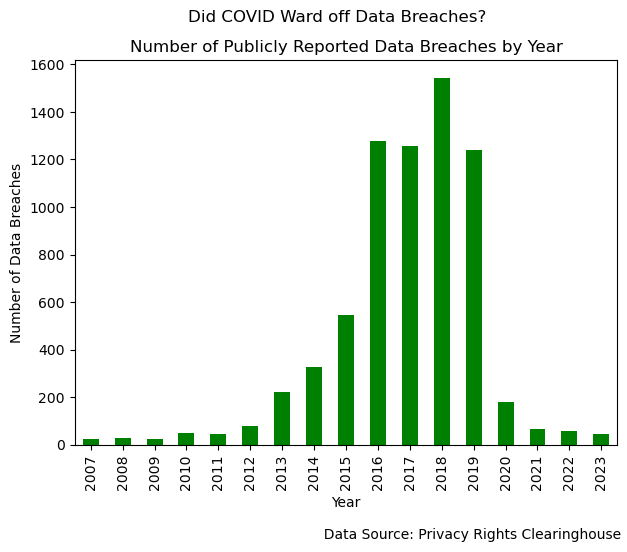

In [54]:
from matplotlib import pylab as plt
# Some Basic Bar Charts
target = dates["Breach Year"].value_counts()
# Filter Dataset (I believe only starts in 2007)
target = target[target > 5].sort_index()
print(target)

plt.figure(figsize=(7,5))
target.plot(kind = "bar", color="green")
plt.xlabel('Year\n \n                                                          Data Source: Privacy Rights Clearinghouse') 
plt.ylabel("Number of Data Breaches")
plt.suptitle("Did COVID Ward off Data Breaches?")
plt.title("Number of Publicly Reported Data Breaches by Year")
plt.show()

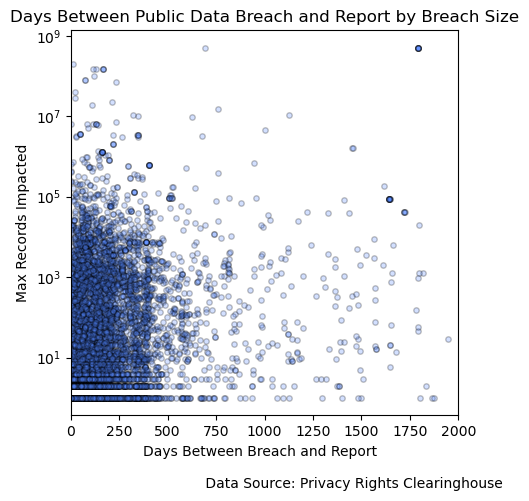

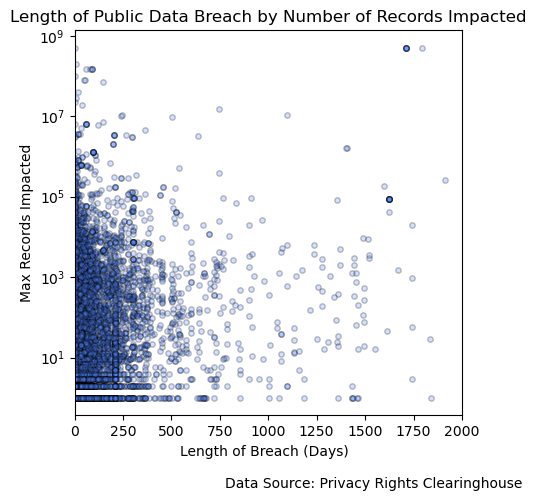

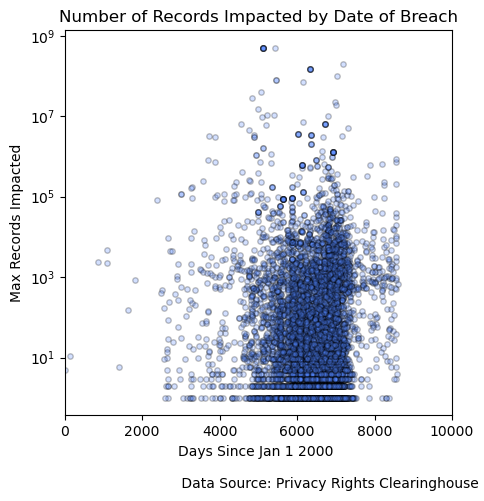

In [93]:
plt.figure(figsize=(5,5))
# Color choice #5286ff is officially the visual representation with those with diabetes. 
plt.scatter(dates["Days Until Reported"], dates['Max Records Impacted'], alpha=0.25, s=15, c="#5286ff",edgecolors="black")
plt.xlabel('Days Between Breach and Report  \n \n                                         Data Source: Privacy Rights Clearinghouse')
plt.yscale('log')
plt.yticks = 10**np.arange(0,11,2)
plt.xlim(0,2000)
plt.ylabel("Max Records Impacted")
plt.suptitle("")
plt.title("Days Between Public Data Breach and Report by Breach Size")
plt.show()


plt.figure(figsize=(5,5))
# Color choice #5286ff is officially the visual representation with those with diabetes. 
plt.scatter(dates["Length of Breach (Days)"], dates['Max Records Impacted'], alpha=0.25, s=15, c="#5286ff", edgecolors="black")
plt.xlabel('Length of Breach (Days)  \n \n                                                Data Source: Privacy Rights Clearinghouse')
plt.yscale('log')
plt.yticks = 10**np.arange(0,11,2)
plt.xlim(0,2000)
plt.ylabel("Max Records Impacted")
plt.suptitle("")
plt.title("Length of Public Data Breach by Number of Records Impacted")
plt.show()


plt.figure(figsize=(5,5))
# Color choice #5286ff is officially the visual representation with those with diabetes. 
plt.scatter(dates["Day # of Breach"], dates['Max Records Impacted'], alpha=0.25, s=15, c="#5286ff", edgecolors="black")
plt.xlabel('Days Since Jan 1 2000 \n \n                                 Data Source: Privacy Rights Clearinghouse')
plt.yscale('log')
plt.yticks = 10**np.arange(0,11,2)
plt.xlim(0,10000)
plt.ylabel("Max Records Impacted")
plt.suptitle("")
plt.title("Number of Records Impacted by Date of Breach")
plt.show()


In [44]:
#Preprocessing the Information Type Column 
print(breaches["Information Types"][0])
#info = pd.DataFrame(breaches['Information Types'].tolist())
info = breaches["Information Types"].astype(str)
info = info.str.replace('[', '')
info = info.str.replace(']', '')
#info = pd.json_normalize(info)
#info = info.apply(pd.Series)

#TODO figure this out, might just have to manually do this, but there are 2 nice features here
info

[{"type": "UNKN", "encryption_status": "UNENCRYPTED", "explanation": "The specific types of information affected were not disclosed in the provided breach notification letter, only a placeholder [Impacted Data] was mentioned without details."}]


0        {"type": "UNKN", "encryption_status": "UNENCRY...
1        {"type": "IDENTIFIER", "encryption_status": "U...
2        {"type": "UNKN", "encryption_status": "UNKN", ...
3        {"type": "UNKN", "encryption_status": "UNKN", ...
4        {"type": "UNKN", "encryption_status": "UNKN", ...
                               ...                        
35162    {"type": "UNKN", "encryption_status": "UNKN", ...
35163    {"type": "IDENTIFIER", "encryption_status": "U...
35164    {"type": "HEALTH", "encryption_status": "UNENC...
35165    {"type": "UNKN", "encryption_status": "UNKN", ...
35166    {"type": "IDENTIFIER", "encryption_status": "U...
Name: Information Types, Length: 35167, dtype: object

## Putting it all together

In [45]:
data = breaches[["Name of Entity","Breach Type", "Source", "Organization Type", "breach_location_state", "Reported Date", "Date of Breach", "Date of Breach End", "Max Records Impacted", "State Records Impacted from Source"]]
data

# Clean Target Variable
data["Max Records Impacted"] = data["Max Records Impacted"].replace("UNKN", None)
data["Max Records Impacted"] = data["Max Records Impacted"].apply(pd.to_numeric)

# Clean Time Features
# TODO figure out what to do with UNKN Dates
data[["Reported Date", "Date of Breach", "Date of Breach End"]] = (data[["Reported Date", 
    "Date of Breach", "Date of Breach End"]].replace("UNKN", "1900/01/01"))
# Bad Data
data = data.replace("2014/00/00", None)
data = data.replace("2015/09/31", None)
data = data.replace("2016/02/31", None)

# Drop NA rows (UNKN is fine)
data = data.dropna(axis="index")

# Feature Engineering
data[["Reported Date", "Date of Breach", "Date of Breach End"]] = data[["Reported Date", "Date of Breach", "Date of Breach End"]].apply(pd.to_datetime, format='mixed')
data["Length of Breach (Days)"] = (data["Date of Breach End"] - data["Date of Breach"]).dt.days.clip(lower=0)
data["Days Until Reported"] = (data["Reported Date"] - data["Date of Breach"]).dt.days.clip(lower=0)

print(data["Max Records Impacted"].describe())
data

/var/folders/ks/kylnnfwn2214tmv9rl7gyb480000gn/T/ipykernel_87726/1794954251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Max Records Impacted"] = data["Max Records Impacted"].replace("UNKN", None)


count    2.704100e+04
mean     6.384138e+05
std      2.536193e+07
min      0.000000e+00
25%      6.000000e+00
50%      3.700000e+02
75%      2.945000e+03
max      3.000000e+09
Name: Max Records Impacted, dtype: float64


/var/folders/ks/kylnnfwn2214tmv9rl7gyb480000gn/T/ipykernel_87726/1794954251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Max Records Impacted"] = data["Max Records Impacted"].apply(pd.to_numeric)
/var/folders/ks/kylnnfwn2214tmv9rl7gyb480000gn/T/ipykernel_87726/1794954251.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["Reported Date", "Date of Breach", "Date of Breach End"]] = (data[["Reported Date",


,Name of Entity,Breach Type,Source,Organization Type,breach_location_state,Reported Date,Date of Breach,Date of Breach End,Max Records Impacted,State Records Impacted from Source,Length of Breach (Days),Days Until Reported
1,Gannett Company Inc.,HACK,IA,BSO,Virginia,2017-04-28,2017-03-30,1900-01-01,18100.0,UNKN,0,29
2,Somerset County,UNKN,IN,GOV,UNKN,2022-09-28,2022-05-19,1900-01-01,14599.0,7,0,132
3,Bed Bath & Beyond Inc.,UNKN,ME,BSR,New Jersey,2018-02-13,2017-11-21,2017-12-08,1.0,1,17,84
4,Angola Wire Products Inc.,UNKN,IN,BSO,Indiana,2023-06-02,2023-01-05,1900-01-01,1085.0,647,0,148
5,State Industrial Products,UNKN,ME,BSO,UNKN,2017-08-04,2017-02-16,2017-06-25,1.0,1,129,169
...,...,...,...,...,...,...,...,...,...,...,...,...
35161,Staminus Communications,HACK,MD,BSO,California,2016-04-11,2016-03-10,1900-01-01,67.0,67,0,32
35162,Bristol Industries LLC,HACK,MD,BSO,Alaska,2020-01-09,2019-03-23,2019-09-26,1.0,1,187,292
35163,ZP Group,HACK,NH,BSO,UNKN,2018-07-26,2018-02-18,2018-04-28,1.0,UNKN,69,158
35164,Northwood Inc.,HACK,MT,MED,UNKN,2019-07-15,2019-05-03,2019-05-06,180.0,180,3,73


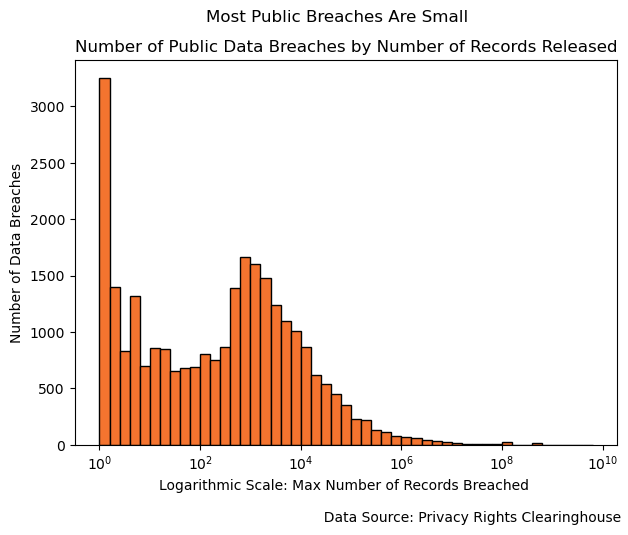

In [154]:
target = data["Max Records Impacted"]
#target = np.log(target + 1)
#print(np.sort(target))
bins = 10**np.arange(0,10, 0.2)

plt.figure(figsize=(7,5))
plt.hist(target, bins = bins, color ="#F4742F", edgecolor = "black")
plt.xscale('log')
plt.xticks(10**np.arange(0,11,2))
#plt.gca().set_xscale("log")
#target.plot.hist(bins = np.logspace(np.log10(1.0),np.log10(15.0), int(np.sqrt(target.shape[0]))), color ="#5286ff", edgecolor = "black")
plt.xlabel('Logarithmic Scale: Max Number of Records Breached \n \n                                                          Data Source: Privacy Rights Clearinghouse') 
plt.ylabel("Number of Data Breaches")
plt.suptitle("Most Public Breaches Are Small")
plt.title("Number of Public Data Breaches by Number of Records Released")
plt.show()


Index(['BSO', 'MED', 'BSF', 'BSR', 'EDU', 'GOV', 'NGO', 'UNKN'], dtype='object', name='Organization Type')


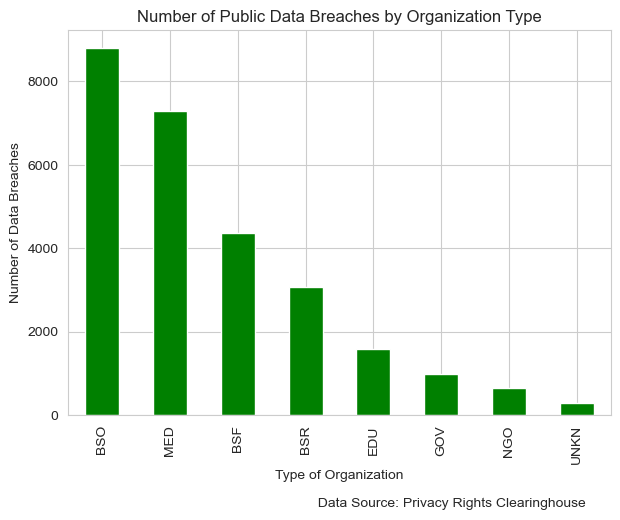

Index(['IN', 'HHS', 'MD', 'ME', 'NH', 'MT', 'TX', 'IA', 'CA', 'WA', 'WI', 'MA',
       'VT', 'NJ', 'OR', 'DE'],
      dtype='object', name='Source')


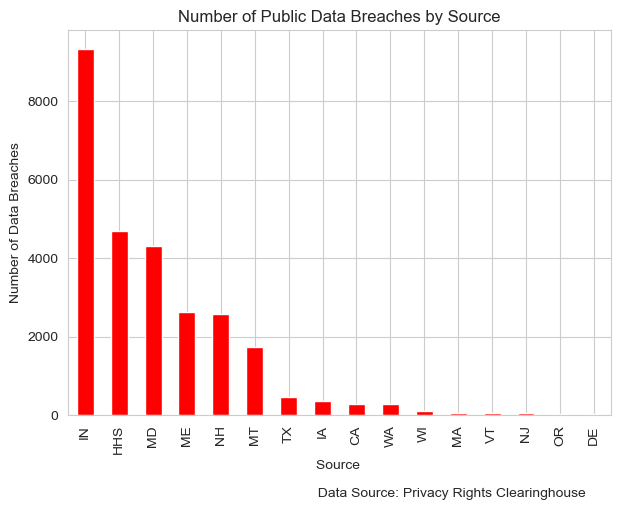

In [188]:
# Some Basic Bar Charts
target = data["Organization Type"].value_counts()
print(target.index)

plt.figure(figsize=(7,5))
target.plot(kind = "bar", color="green")
plt.xlabel('Type of Organization\n \n                                                          Data Source: Privacy Rights Clearinghouse') 
plt.ylabel("Number of Data Breaches")
plt.suptitle("")
plt.title("Number of Public Data Breaches by Organization Type")
plt.show()

target = data["Source"].value_counts()
print(target.index)

plt.figure(figsize=(7,5))
target.plot(kind = "bar", color="red")
plt.xlabel('Source \n \n                                                          Data Source: Privacy Rights Clearinghouse') 
plt.ylabel("Number of Data Breaches")
plt.suptitle("")
plt.title("Number of Public Data Breaches by Source")
plt.show()

Breach Type
UNKN    13520
HACK     9085
DISC     1812
PORT      959
INSD      914
PHYS      493
STAT      179
CARD       79
Name: count, dtype: int64


/var/folders/ks/kylnnfwn2214tmv9rl7gyb480000gn/T/ipykernel_51672/2284267443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Breach Type", y="Max Records Impacted", data = data, palette="blend:gold,dodgerblue", log_scale=True)


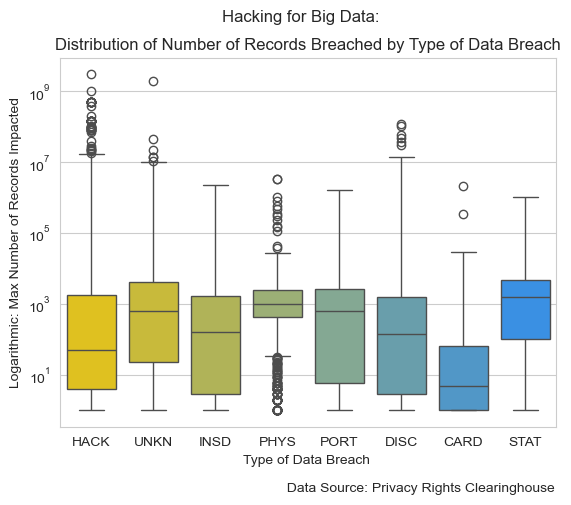

In [165]:
# By Breach Type
print(data['Breach Type'].value_counts())

import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="Breach Type", y="Max Records Impacted", data = data, palette="blend:gold,dodgerblue", log_scale=True)

plt.xlabel('Type of Data Breach \n \n                                                          Data Source: Privacy Rights Clearinghouse')
plt.ylabel("Logarithmic: Max Number of Records Impacted")

plt.suptitle("Hacking for Big Data:")
plt.title("Distribution of Number of Records Breached by Type of Data Breach")
plt.show()

Organization Type
BSO     8789
MED     7291
BSF     4371
BSR     3082
EDU     1593
GOV      985
NGO      647
UNKN     283
Name: count, dtype: int64


/var/folders/ks/kylnnfwn2214tmv9rl7gyb480000gn/T/ipykernel_51672/3078939487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Organization Type", y="Max Records Impacted", data = data, palette="blend:gold,dodgerblue", log_scale=True)


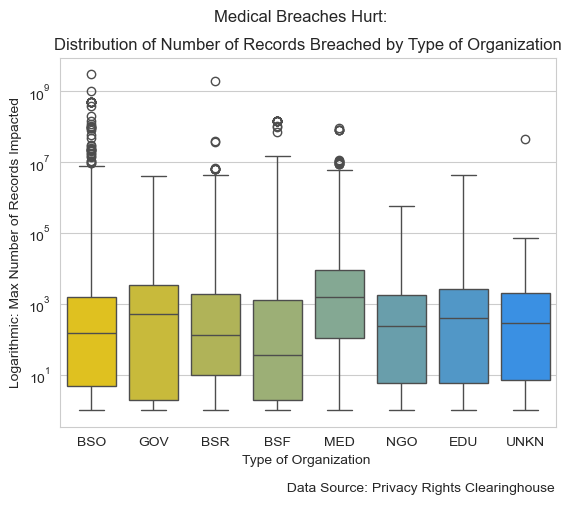

In [167]:
# By Org Type
print(data["Organization Type"].value_counts())

import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="Organization Type", y="Max Records Impacted", data = data, palette="blend:gold,dodgerblue", log_scale=True)

plt.xlabel('Type of Organization \n \n                                                          Data Source: Privacy Rights Clearinghouse')
plt.ylabel("Logarithmic: Max Number of Records Impacted")

plt.suptitle("Medical Breaches Hurt:")
plt.title("Distribution of Number of Records Breached by Type of Organization")
plt.show()

Source
IN     9333
HHS    4691
MD     4312
ME     2627
NH     2575
MT     1740
TX      456
IA      361
CA      297
WA      286
WI      101
MA       62
VT       62
NJ       59
OR       41
DE       38
Name: count, dtype: int64


/var/folders/ks/kylnnfwn2214tmv9rl7gyb480000gn/T/ipykernel_51672/3778159930.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="Source", y="Max Records Impacted", data = data, palette="blend:gold,dodgerblue", log_scale=True)


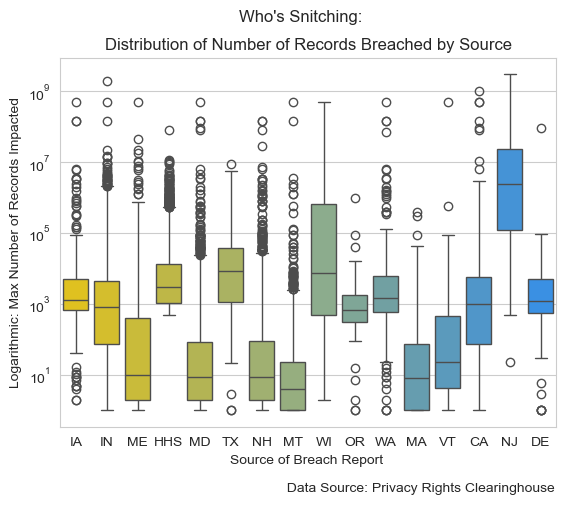

In [177]:
# By Source
print(data["Source"].value_counts())

import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x="Source", y="Max Records Impacted", data = data, palette="blend:gold,dodgerblue", log_scale=True)

plt.xlabel('Source of Breach Report \n \n                                                          Data Source: Privacy Rights Clearinghouse')
plt.ylabel("Logarithmic: Max Number of Records Impacted")

plt.suptitle("Who's Snitching:")
plt.title("Distribution of Number of Records Breached by Source")
plt.show()